## Project Title:
Diabetes Prediction using Machine Learning

### Project Scenario:
Create a model to predict whether or not a person has diabetes based on various health-related attributes

### Step1-Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step2-Loading Dataset

In [2]:
data = pd.read_csv("diabetes.csv") 
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Step3-Exploratory Data Analysis(EDA)

In [3]:
data.shape  # number of rows and columns i the dataset

(768, 9)

In [4]:
data.columns  # Showing the columns/ features of the dataset.

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


There are 768 entries (rows) in the dataset with 8 features and an Outcome column (target variable).
Each column has 768 non-null entries, indicating that there are no missing values.
The data types of the columns are as follows:
Integer: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, Age, and Outcome.
Float: BMI and DiabetesPedigreeFunction

In [6]:
data.isnull().sum() # checking for null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.describe()  # show the statistical summary ot the numerical features.

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


#### Data cleaning:
By analysing the given data some features contails 0 as values which is incorrect. Creating a copy of the dataset to fix this.

In [8]:
df_copy = data.copy()
features=['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']

for i in features:
    df_copy[i] = df_copy[i].replace(0, df_copy[i].mean())
    
df_copy.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0


In [9]:
data[data.Insulin != 0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1
...,...,...,...,...,...,...,...,...,...
753,0,181,88,44,510,43.3,0.222,26,1
755,1,128,88,39,110,36.5,1.057,37,1
760,2,88,58,26,16,28.4,0.766,22,0
763,10,101,76,48,180,32.9,0.171,63,0


### EDA based on Target Variable

In [10]:
outcome_count=df_copy["Outcome"].value_counts()
outcome_count


Outcome
0    500
1    268
Name: count, dtype: int64

'0' indicates Non-Diabetic and '1' indicates diabetic patients.

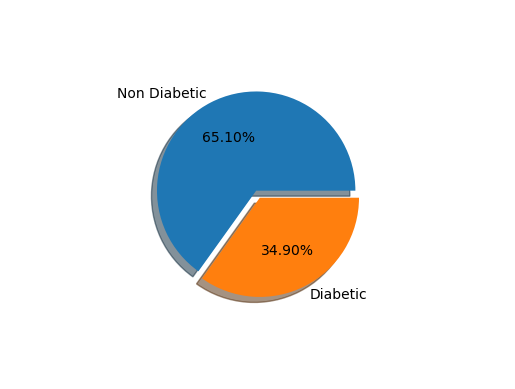

In [11]:
plt.axis("equal")
plt.pie(outcome_count,labels=["Non Diabetic","Diabetic"], shadow=True, autopct='%1.2f%%',radius=0.5,explode=[0.02,0.02])
plt.show()

##### 34.90% of patients are diabetic. 

### EDA based on numerical features

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

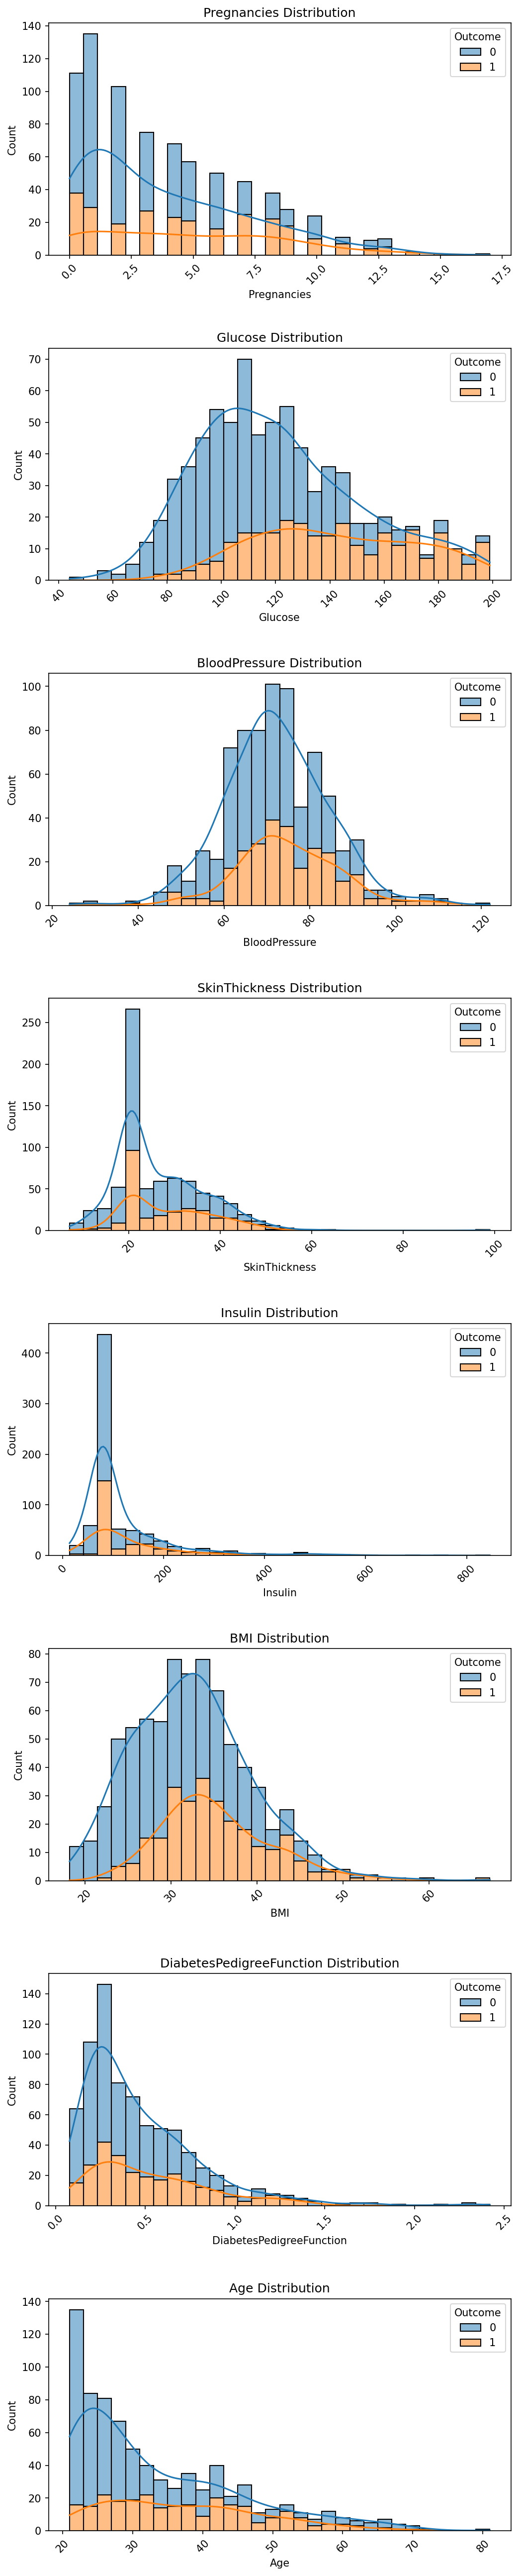

In [12]:
# Define the numerical features
numerical_features=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

# Set up the subplots
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(8, 5 * len(numerical_features)), dpi=150)

# Iterate through each numerical feature and create a histogram
for i, feature in enumerate(numerical_features):
    sns.histplot(ax=axes[i], data=df_copy, x=feature, hue="Outcome", kde=True, bins=30, multiple="stack")
    axes[i].set_title(f'{feature} Distribution')
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)

# Adjusting layout
plt.subplots_adjust(top=0.95, hspace=0.4)

plt.show()

##### The histograms above show that most of them appear to be positively skewed, with Glucose and Blood Pressure having the closest distribution to a normal distribution

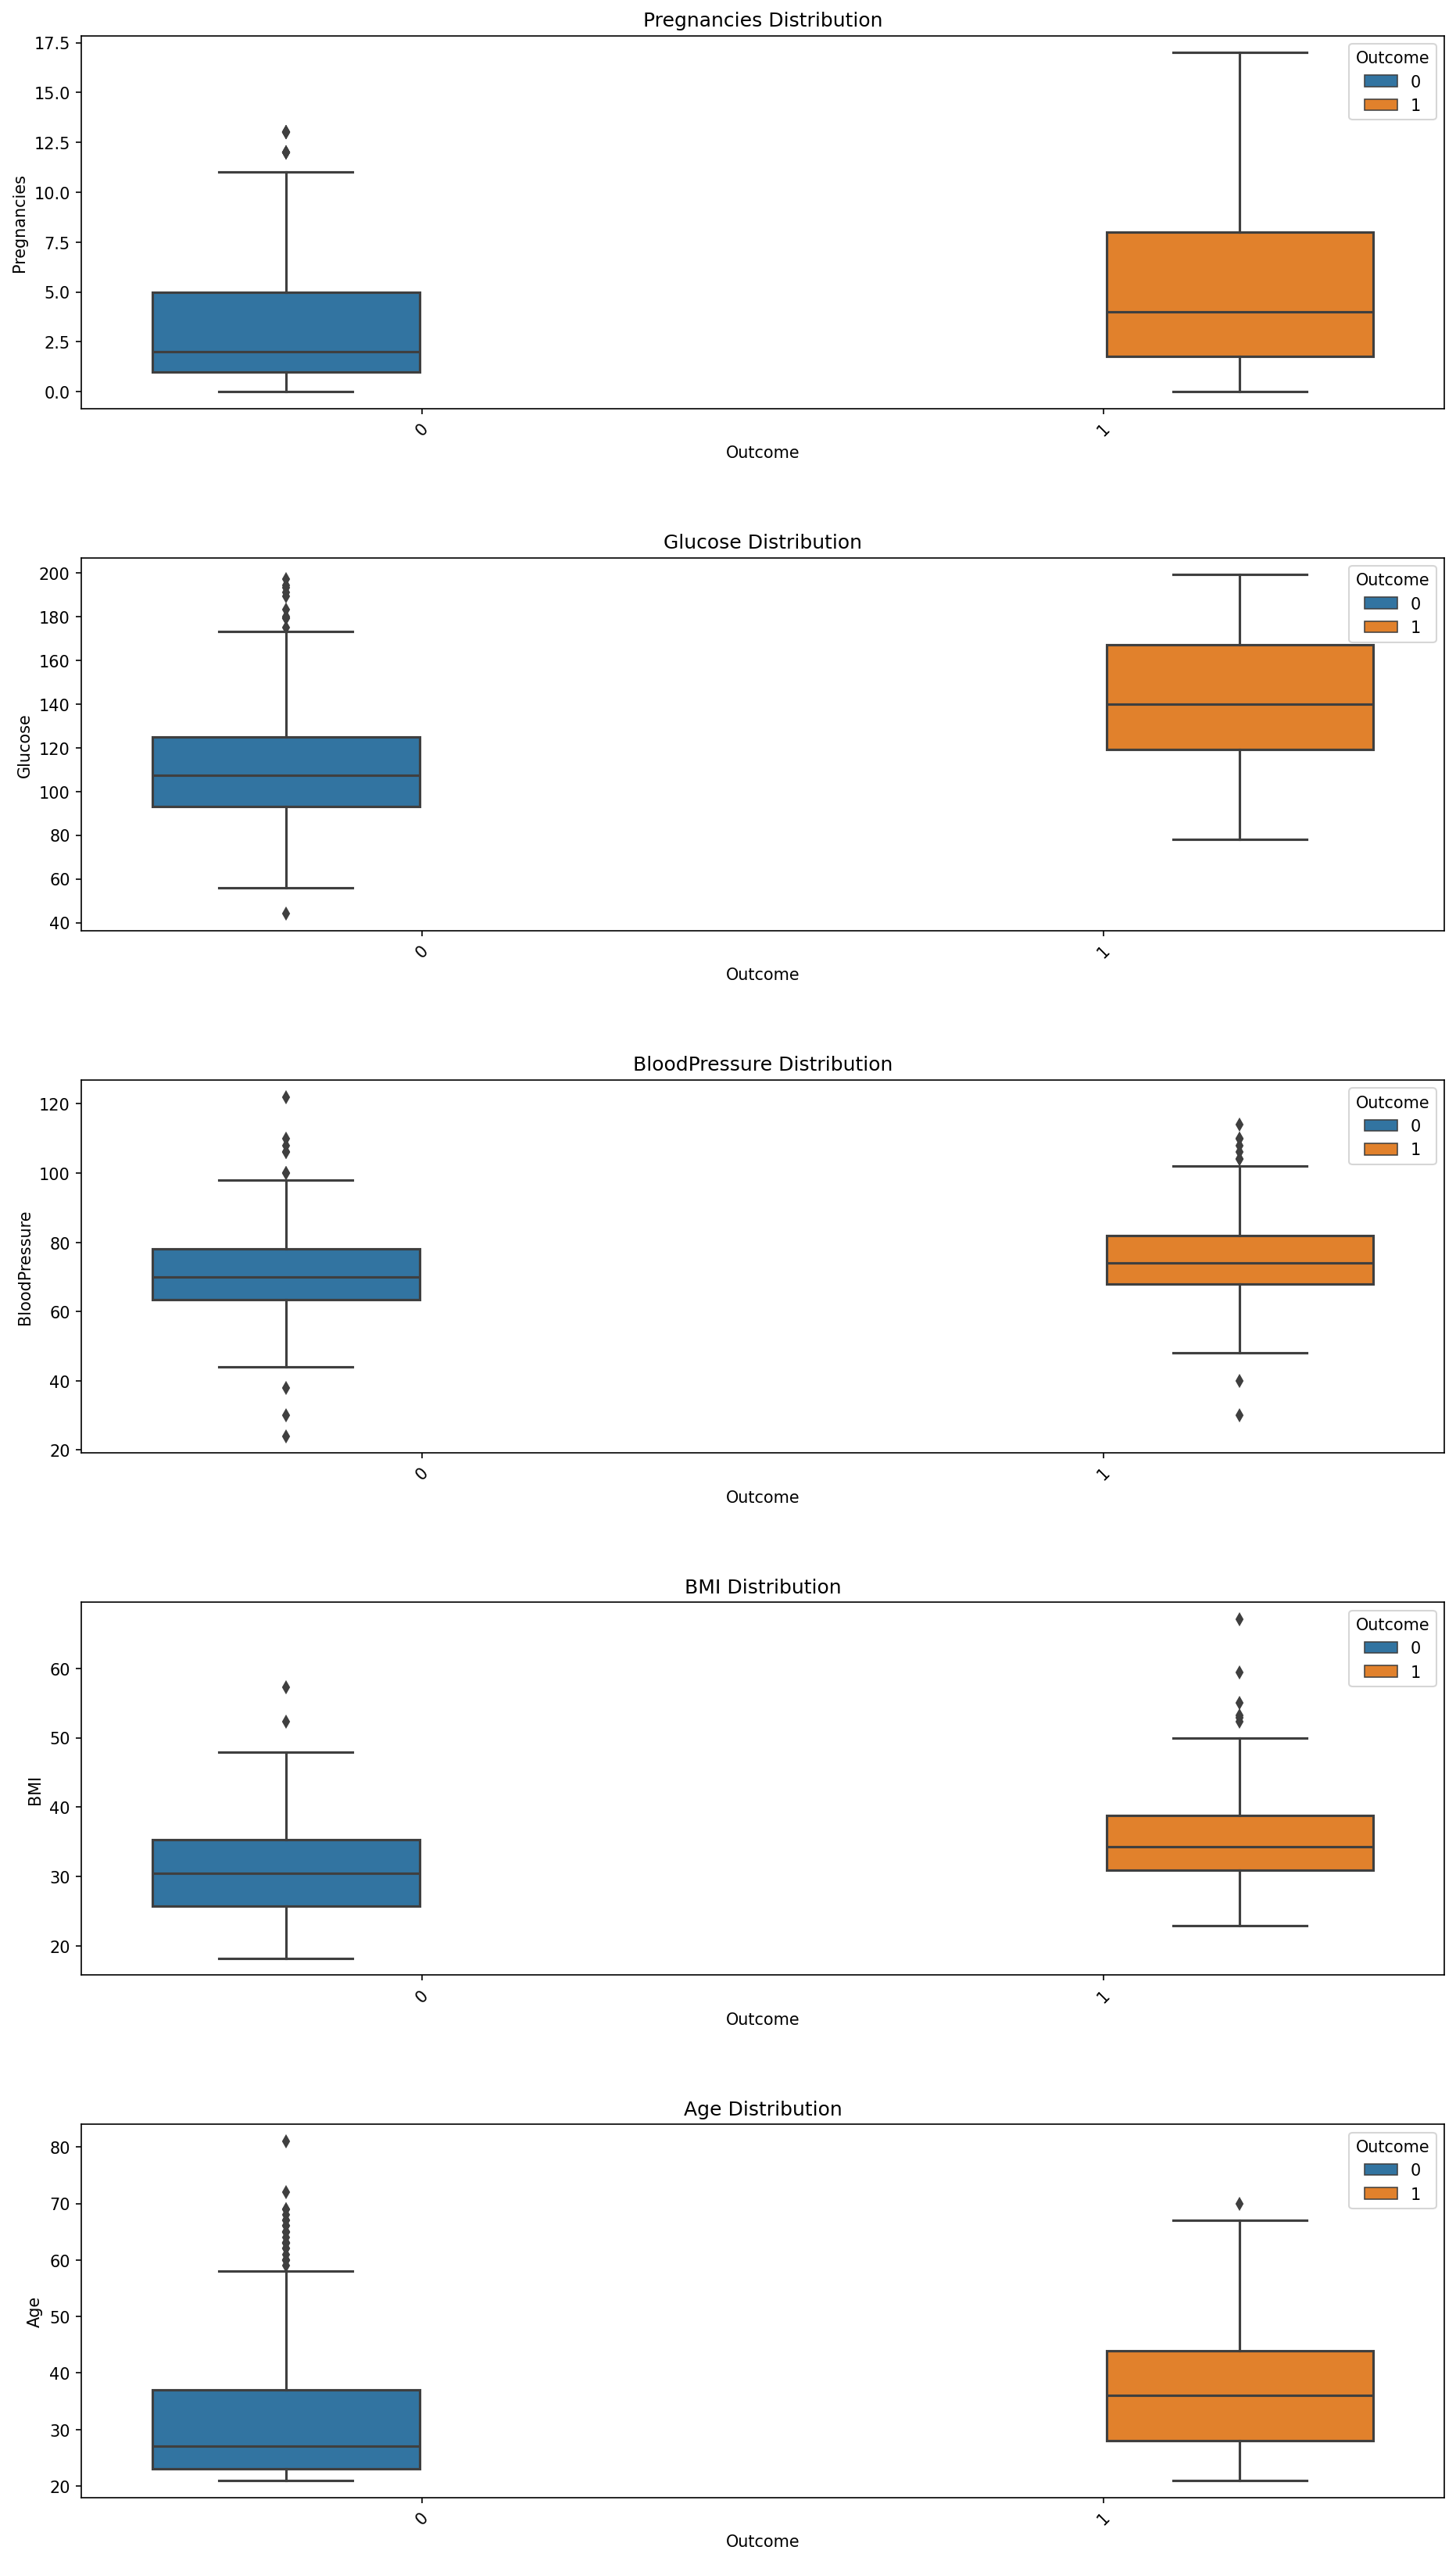

In [13]:
# Define the numerical features
numerical_features=['Pregnancies', 'Glucose', 'BloodPressure','BMI', 'Age']

# Set up the subplots
fig, axes = plt.subplots(len(numerical_features), 1, figsize=(15, 5 * len(numerical_features)), dpi=150)

# Iterate through each numerical feature and create a box plot
for i, feature in enumerate(numerical_features):
    sns.boxplot(ax=axes[i], data=df_copy, x="Outcome", y=feature ,hue="Outcome")
    axes[i].set_title(f'{feature} Distribution')
    axes[i].tick_params(axis='x', rotation=45, labelsize=10)

# Adjusting layout
plt.subplots_adjust(top=0.95, hspace=0.4)

plt.show()

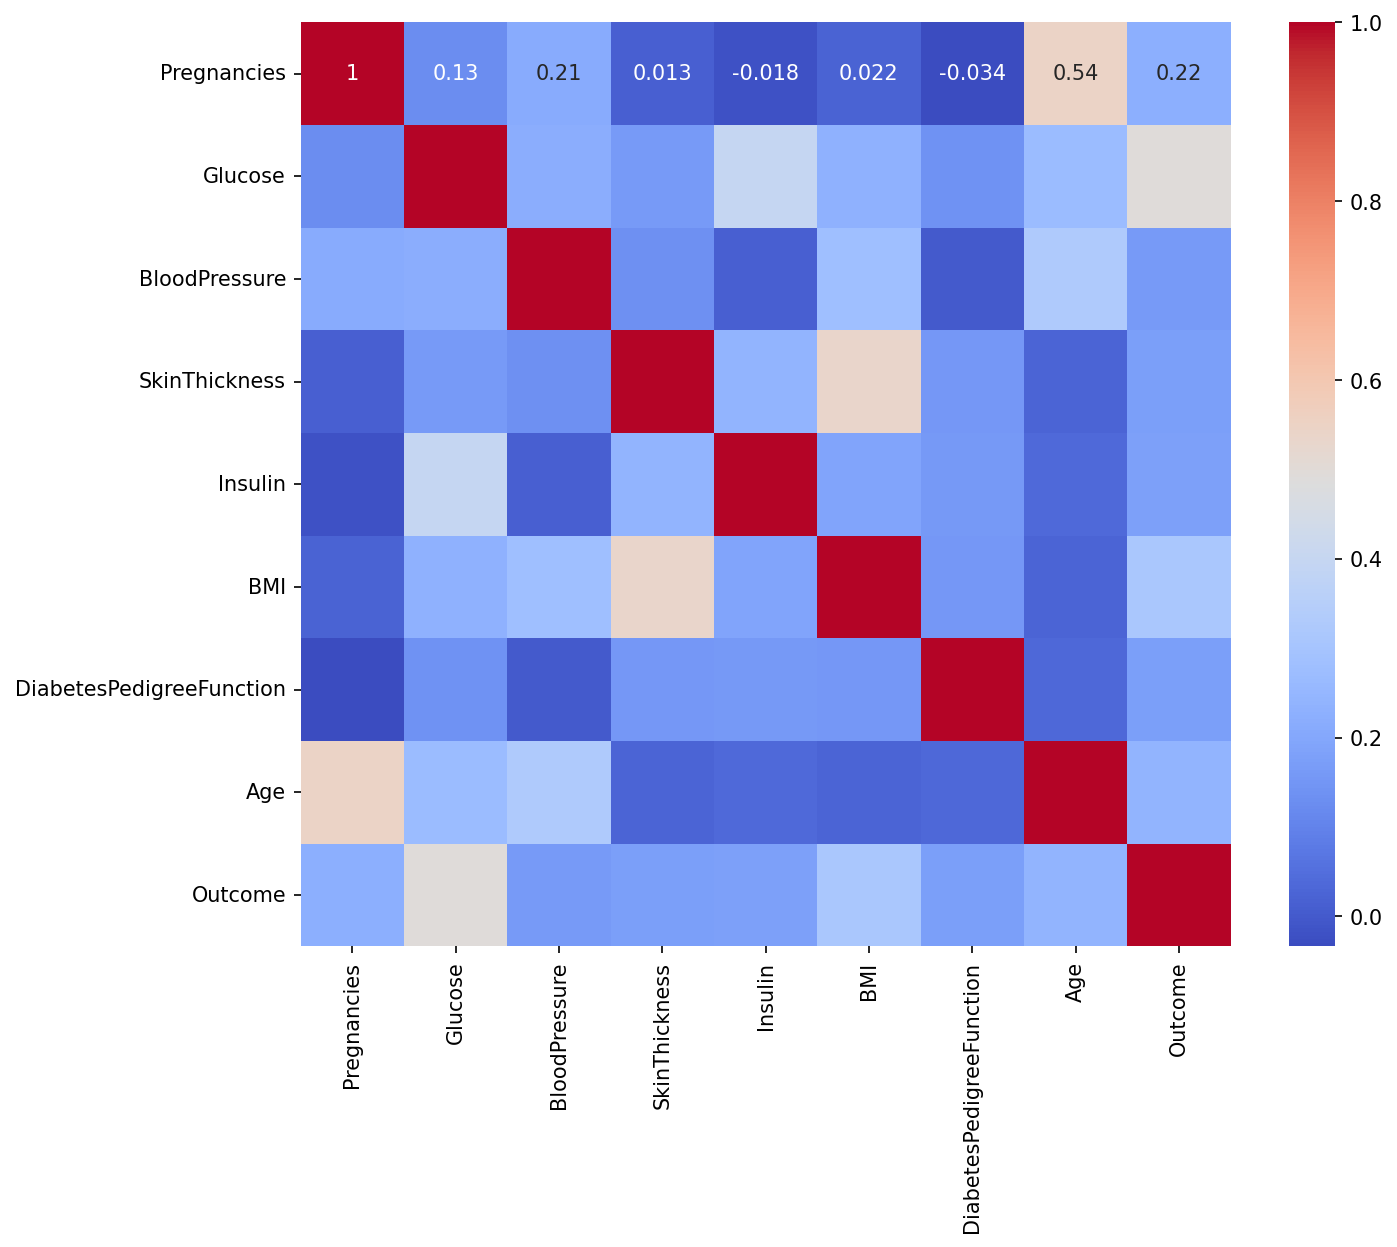

In [14]:
plt.figure(figsize=(10,8),dpi=150)
# Create correlation matrix
corr = df_copy.corr(numeric_only=True)
# Create heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm');
# Creating a heatmap of the correlation matrix is an excellent way to visually represent the relationships between numerical features. 

Features such as Glucose (0.49) and BMI (0.31) exhibit relatively strong positive correlations with the target variable "Outcome," indicating that higher values of Glucose and BMI are associated with a higher likelihood of diabetes.
Age also shows a moderate positive correlation (0.24) with the target variable, suggesting that older individuals are more likely to have diabetes.
Other features have weaker correlations with the target variable, but some still show notable correlations, such as Insulin (0.18) and SkinThickness (0.18).
The parameter with the highest positive correlation to each other is BMI and Skin Thickness. This is further confirmed by the SNS pair plot. The rest do not have strong multi-collinearity to each other.

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

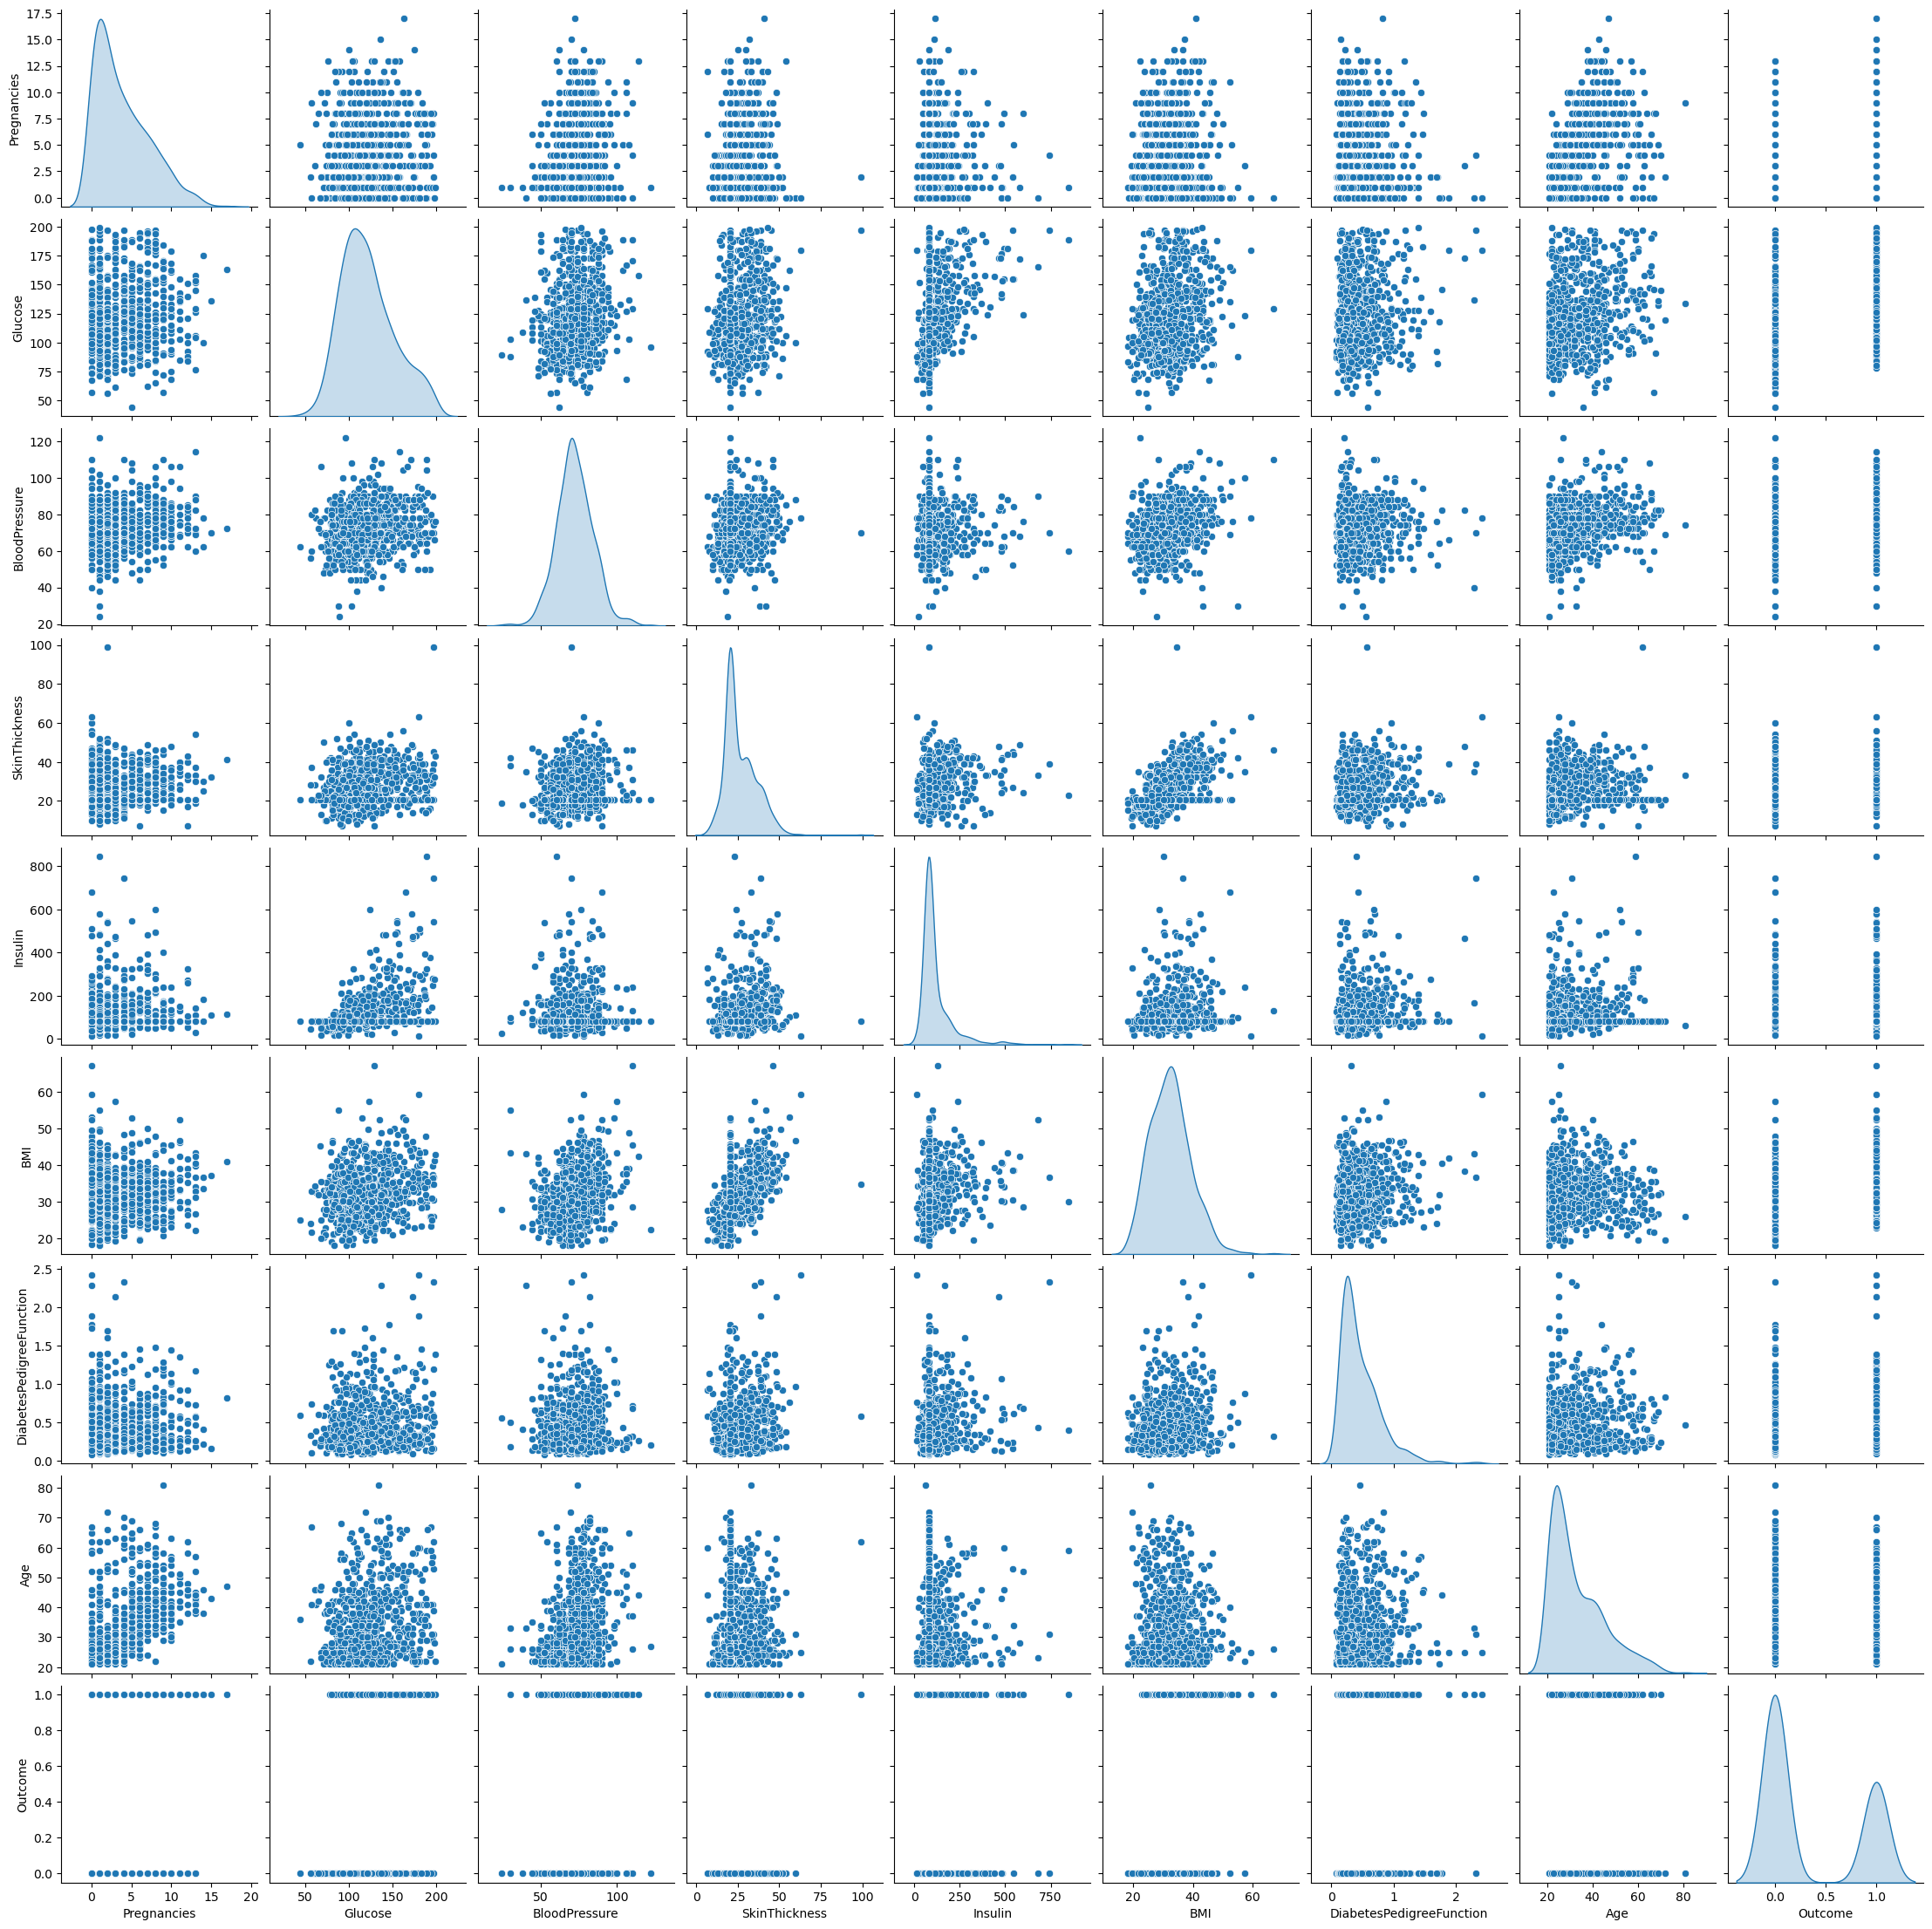

In [15]:
sns.pairplot(df_copy,diag_kind='kde')

#### Feature Selection

In [16]:
data1 = df_copy.copy()
x = data1.drop(['Outcome'], axis=1)  # features using for prediction.
y = data1['Outcome']  # target variable/ Outcome need to predict.


#### Feature Scaling

In [21]:

# Standardization  (Z-score Normalization)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit the scaler on the data
#scaler.fit(x)

# Fit and Transform the data
scaled_data = scaler.fit_transform(x)

# Print the scaled data
print(scaled_data[:5])


[[ 0.63994726  0.86527574 -0.0210444   0.87205698 -0.41776815  0.16725546
   0.46849198  1.4259954 ]
 [-0.84488505 -1.20598931 -0.51658286  0.2486783  -0.41776815 -0.85153454
  -0.36506078 -0.19067191]
 [ 1.23388019  2.01597855 -0.68176235 -0.6306536  -0.41776815 -1.33182125
   0.60439732 -0.10558415]
 [-0.84488505 -1.07448042 -0.51658286 -0.37470037 -0.26510678 -0.6332224
  -0.92076261 -1.04154944]
 [-1.14185152  0.50362629 -2.66391618  0.87205698  0.5304233   1.54989902
   5.4849091  -0.0204964 ]]


In [25]:
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(x)

# Print the scaled data
print(scaled_data[:5])

[[0.35294118 0.67096774 0.48979592 0.30434783 0.07908591 0.31492843
  0.23441503 0.48333333]
 [0.05882353 0.26451613 0.42857143 0.23913043 0.07908591 0.17177914
  0.11656704 0.16666667]
 [0.47058824 0.89677419 0.40816327 0.14713542 0.07908591 0.10429448
  0.25362938 0.18333333]
 [0.05882353 0.29032258 0.42857143 0.17391304 0.09615385 0.20245399
  0.03800171 0.        ]
 [0.         0.6        0.16326531 0.30434783 0.18509615 0.50920245
  0.94363792 0.2       ]]


#### Splitting the Dataset

In [37]:
from sklearn.model_selection import train_test_split

X = scaled_data
Y = data1['Outcome']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=0)
#  20% of the data should be used for testing, while 80% will be used for training.

In [31]:
print("Shape of x_train: ",x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test:",y_test.shape)

Shape of x_train:  (614, 8)
Shape of x_test:  (154, 8)
Shape of y_train:  (614,)
Shape of y_test: (154,)


### Mechine Learning Models

#### 1. LOGISTIC REGRESSION

In [58]:
from sklearn.linear_model import LogisticRegression

#creating logistic regression model
logistic_model = LogisticRegression()

#training
logistic_model.fit(x_train, y_train)

# prediction
logistic_pred=logistic_model.predict(x_test)

logistic_model.score(x_test,y_test)

0.8116883116883117

In [59]:
# Evaluate the model

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
logistic_accuracy = accuracy_score(y_test, logistic_pred)
print("Logistic_Accuracy:", logistic_accuracy)

# Print a classification report
print(classification_report(y_test,logistic_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test,logistic_pred))

Logistic_Accuracy: 0.8116883116883117
              precision    recall  f1-score   support

           0       0.83      0.92      0.87       107
           1       0.75      0.57      0.65        47

    accuracy                           0.81       154
   macro avg       0.79      0.75      0.76       154
weighted avg       0.81      0.81      0.80       154

Confusion Matrix:
[[98  9]
 [20 27]]


98 - instances were correctly predicted as +ve
27 - instances wre correctly predicted as -ve

#### 2. DECISION TREE

In [43]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Create a Decision Tree classifier
DT_model= DecisionTreeClassifier(criterion="gini")

# Fit the model to the training data
DT_model.fit(x_train, y_train)

# Make predictions on the test data
DT_pred = DT_model.predict(x_test)

DT_model.score(x_test,y_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
DT_accuracy = accuracy_score(y_test, DT_pred)
print("DT_Accuracy:", DT_accuracy)

# Print a classification report
print(classification_report(y_test,DT_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test,DT_pred))

DT_Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

           0       0.83      0.80      0.82       107
           1       0.59      0.64      0.61        47

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.72       154
weighted avg       0.76      0.75      0.76       154

Confusion Matrix:
[[86 21]
 [17 30]]


#### 3. RANDOM FOREST

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest classifier
RF_model = RandomForestClassifier(n_estimators=20)  # You can adjust the number of estimators as needed

# Fit the model to the training data
RF_model.fit(x_train, y_train)

# Make predictions on the test data
RF_pred = RF_model.predict(x_test)


RF_model.score(x_test,y_test)

# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
RF_accuracy = accuracy_score(y_test, RF_pred)
print("RF_Accuracy:", RF_accuracy)

# Print a classification report
print(classification_report(y_test,RF_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test,RF_pred))

RF_Accuracy: 0.8116883116883117
              precision    recall  f1-score   support

           0       0.86      0.87      0.87       107
           1       0.70      0.68      0.69        47

    accuracy                           0.81       154
   macro avg       0.78      0.78      0.78       154
weighted avg       0.81      0.81      0.81       154

Confusion Matrix:
[[93 14]
 [15 32]]


#### 4. SVC (SUPPORT VECTOR CLASSIFIER)

In [45]:
from sklearn.svm import SVC

# Create an SVM classifier
svm_model = SVC(kernel='linear')  # You can choose different kernel functions (linear, rbf, etc.)

# Fit the model to the training data
svm_model.fit(x_train, y_train)

# Make predictions on the test data
svm_pred = svm_model.predict(x_test)


svm_model.score(x_test,y_test)


# Evaluate model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
svm_accuracy= accuracy_score(y_test, svm_pred)
print("SVM_Accuracy:", svm_accuracy)

# Print a classification report
print(classification_report(y_test,svm_pred))

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test,svm_pred))

SVM_Accuracy: 0.7987012987012987
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       107
           1       0.72      0.55      0.63        47

    accuracy                           0.80       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.79      0.80      0.79       154

Confusion Matrix:
[[97 10]
 [21 26]]


In [46]:
# Comparing models
models = pd.DataFrame({'Model': ['Logistic Regression','Decission Tree','Random Forest','Support Vector Machines'],  
                      'Model Accuracy':[logistic_accuracy,DT_accuracy,RF_accuracy,svm_accuracy],
                       })

models.sort_values(by='Model Accuracy', ascending=False)

,Model,Model Accuracy
0,Logistic Regression,0.811688
2,Random Forest,0.811688
3,Support Vector Machines,0.798701
1,Decission Tree,0.753247


According to the accuracy scores, Logistic Regression has the highest accuracy, followed by Random Forest and Support Vector Machines.
Logistic model accuracy is 0.8182

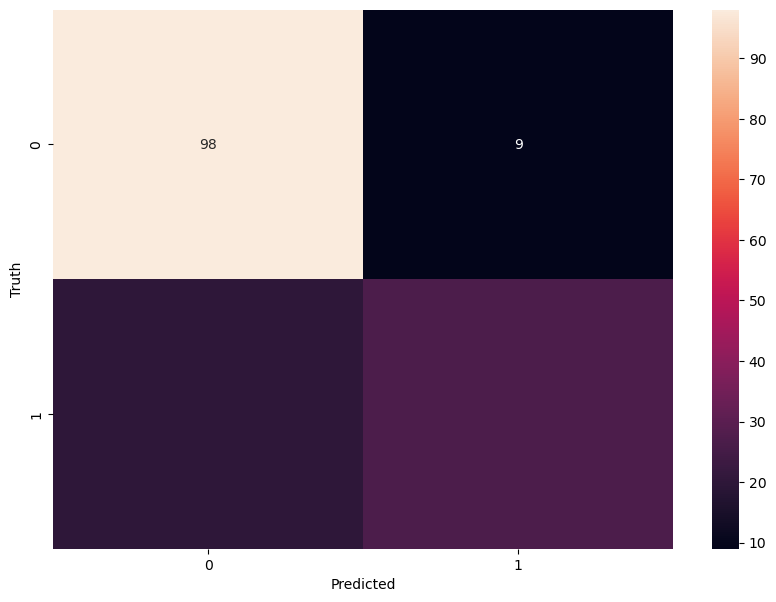

In [61]:
#confusionMatrix = confusion_matrix(y_test, logistic_pred)
cm = confusion_matrix(y_test,logistic_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True,fmt='d')    # 'd' stands for decimal format
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

Conclusion:
From the confusion matrix we can see that: There are total 98+9=107 actual non_diabetic patients and the algorithm predicts 98 of them as non diabetic and 9 of them as diabetic. While there are 19+28=47 actual diabetic patients and the algorithm predicts 19 of them as non-diabetic and 28 of them as diabetic.

#### Sample Checking

In [63]:
import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names")

In [64]:
Pregnancies = int(input("No.of times Pregnancies:"))
Glucose = float(input("Glucose:"))
BloodPressure = float(input("BloodPressure:"))
SkinThickness = float(input("SkinThickness:"))
Insulin = float(input("Insulin:"))
BMI = float(input("BMI:"))
DiabetesPedigreeFunction = float(input("DiabetesPedigreeFunction:"))
Age = int(input("Age:"))

new_data = np.array([[Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin,
                      BMI, DiabetesPedigreeFunction, Age]])
std_data = scaler.transform(new_data)
logistic_pred_new = logistic_model.predict(std_data)

# Mapping the prediction
print("------------------------")
if logistic_pred_new[0] == 0:
    print(logistic_pred_new, "- The person is not diabetic")
else:
    print(logistic_pred_new, "- The person is diabetic")

No.of times Pregnancies: 3
Glucose: 120
BloodPressure: 135
SkinThickness: 16
Insulin: 28
BMI: 35
DiabetesPedigreeFunction: 234
Age: 56


------------------------
[1] - The person is diabetic
